## Building Network Models
# UB Species-collectors Network
### Projections

In [1]:
# Setting paths
import sys,os
import pathlib
sys.path.insert(0,os.path.expanduser('~/caryocar'))
sys.path.insert(0,os.path.abspath('..'))

In [2]:
# Building the networks from data
from setupmodels import scn
from setupmodels import occs
from setupmodels import ni

In [3]:
# Importing libraries for analysis
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
graphsdir = os.path.abspath('./graphs')

if not os.path.isdir(graphsdir):
    !mkdir graphs

---

### Obtaining a taxonomic aggregated network on the family rank

In [5]:
g = dict( occs[['family','species']].groupby('family').apply(lambda g: set(g['species'])) )

In [6]:
scn_agg_family = scn.taxonomicAggregation(g)

In [7]:
print(nx.info(scn_agg_family))

Name: 
Type: SpeciesCollectorsNetwork
Number of nodes: 7242
Number of edges: 43803
Average degree:  12.0969


### The species projection

In [8]:
scn_proj_sp = scn_agg_family.project('species',rule='cosine_similarity')

The $S_{sp}$ projection has a high number of edges

In [9]:
print(nx.info(scn_proj_sp))

Name: 
Type: Graph
Number of nodes: 474
Number of edges: 43756
Average degree: 184.6245


The density is also very high ($39.0\%$), which gives that the probability that an edge exists connecting a pair of random nodes.

In [10]:
nx.density(scn_proj_sp)

0.39032658049437563

Such a network is untractable. The best alternative is to aggregate it on a lower taxonomic rank.

In [ ]:
scn

In [56]:
g = scn_proj_col.copy() # shallow copy of 

In [59]:
scn_agg_family['abbas,b']

AtlasView({'Myrtaceae': {'count': 1}})

In [65]:
scn_agg_family['siqueira,gs']

AtlasView({'Melastomataceae': {'count': 1}, 'Myrtaceae': {'count': 28}})

In [80]:
filt = [(u,v) for u,v,w in filter( lambda e: e[2]<=0.9, g.edges(data='weight') )]

In [81]:
g.remove_edges_from(filt)

In [82]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 6768
Number of edges: 505471
Average degree: 149.3709


In [42]:
g.nodes

NodeView(())

In [36]:
g.nodes()

NodeView(())

In [ ]:
g.remove_edges_from( for e in g.edges(data='') )

### The collectors projection

In [11]:
scn_proj_col = scn_agg_family.project('collectors',rule='cosine_similarity')

In [12]:
print(nx.info(scn_proj_col))

Name: 
Type: Graph
Number of nodes: 6768
Number of edges: 5431799
Average degree: 1605.1415


The density of the network is also high ($23.7\%$), though lower than than the species projection

In [13]:
nx.density(scn_proj_col)

0.23720135192306147

In [ ]:
 for sim in scn_proj_col

In [75]:
list(filter(lambda x: x>10, [1,2,3,10,14,30,2,11,21,0,3]))

[14, 30, 11, 21]

In [76]:
g = scn_proj_col

In [78]:
id(scn_proj_col)

139976083487152

### SCN aggregated by genus

In [87]:
g = dict( occs[['genus','species']].groupby('genus').apply(lambda g: set(g['species'])) )

In [88]:
g

{'Abarema': {'Abarema brachystachya',
  'Abarema cochliacarpos',
  'Abarema filamentosa',
  'Abarema jupunba',
  'Abarema langsdorffii',
  'Abarema langsdorfii'},
 'Abatia': {'Abatia americana', 'Abatia angeliana', 'Abatia tomentosa'},
 'Abietinella': {'Abietinella abietina'},
 'Abolboda': {'Abolboda ebracteata',
  'Abolboda killipii',
  'Abolboda poarchon',
  'Abolboda pulchella'},
 'Abrodictyum': {'Abrodictyum rigidum'},
 'Abrus': {'Abrus precatorius', 'Abrus pulchellus'},
 'Abuta': {'Abuta grandifolia'},
 'Abutilon': {'Abutilon bivalvis',
  'Abutilon costicalyx',
  'Abutilon giganteum',
  'Abutilon ramiflorum'},
 'Acacia': {'Acacia dealbata',
  'Acacia decurrens',
  'Acacia floribunda',
  'Acacia idiomorpha',
  'Acacia longifolia',
  'Acacia mangium',
  'Acacia plumosa',
  'Acacia podalyriifolia',
  'Acacia saligna'},
 'Acaena': {'Acaena eupatoria'},
 'Acalypha': {'Acalypha acuminata',
  'Acalypha amblyodonta',
  'Acalypha aristata',
  'Acalypha brasiliensis',
  'Acalypha claussenii

In [89]:
scn_agg_genus = scn.taxonomicAggregation(g)

In [94]:
scn_genus_projCol = scn.project('collectors',rule='cosine_similarity',thresh=0.7)

In [95]:
print(nx.info(scn_genus_projCol))

Name: 
Type: Graph
Number of nodes: 6768
Number of edges: 10096
Average degree:   2.9835


---

### Threshold vs. Density (family vs genus aggregations)

In [98]:
# SCN aggregated by family
g = dict( occs[['family','species']].groupby('family').apply(lambda g: set(g['species'])) )
scn_family = scn.taxonomicAggregation(g)

scn_family_projSp = scn_family.project('species',rule='cosine_similarity')
scn_family_projCol = scn_family.project('collectors',rule='cosine_similarity')

In [99]:
# SCN aggregated by genus
g = dict( occs[['genus','species']].groupby('genus').apply(lambda g: set(g['species'])) )
scn_genus = scn.taxonomicAggregation(g)

scn_genus_projSp = scn_genus.project('species',rule='cosine_similarity')
scn_genus_projCol = scn_genus.project('collectors',rule='cosine_similarity')

In [103]:
m_scn_family_projCol = nx.adjacency_matrix(scn_family_projCol)
m_scn_genus_projCol = nx.adjacency_matrix(scn_genus_projCol)
m_scn_noagg_projCol = nx.adjacency_matrix(scn.project('collectors',rule='cosine_similarity'))

In [102]:
calculateDensity = lambda m: len(m.data)/np.prod(m.shape) # calculates the density of a sparse matrix

from copy import deepcopy
def filterMatrix(m,thresh):
    # Filters a sparse matrix given a threshold 
    m_filtered = deepcopy(m)
    m_filtered.data = np.where(m_filtered.data >= thresh, m_filtered.data, 0)
    m_filtered.eliminate_zeros()
    return m_filtered

In [115]:
X = np.logspace(-3,0) # threshold values
y_noagg = np.array( [ calculateDensity(filterMatrix(m_scn_noagg_projCol,thresh)) for thresh in X ] )
y_genus = np.array( [ calculateDensity(filterMatrix(m_scn_genus_projCol,thresh)) for thresh in X ] )
y_family = np.array( [ calculateDensity(filterMatrix(m_scn_family_projCol,thresh)) for thresh in X ] )

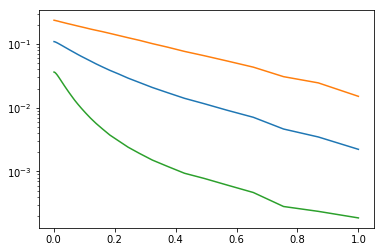

In [116]:
plt.plot(X,y_genus)
plt.plot(X,y_family)
plt.plot(X,y_noagg)

plt.yscale('log')

In [ ]:
# look at the genus-aggregated graph
